<a href="https://colab.research.google.com/github/IvanTolaba/PID/blob/main/TP3_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Las dos imagenes a hacer la operación de suma y resta son:

1. Suma campleada en RGB
2. Promedio
3. Interpolación
4. If-Lighter
5 Salir

Elige una opción
1


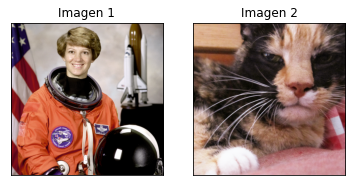

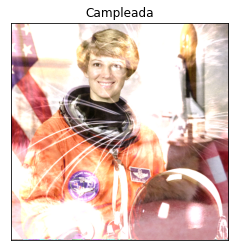

1. Suma campleada en RGB
2. Promedio
3. Interpolación
4. If-Lighter
5 Salir

Elige una opción
2


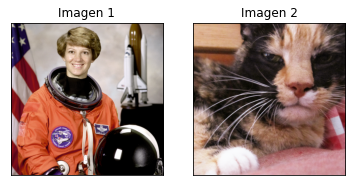

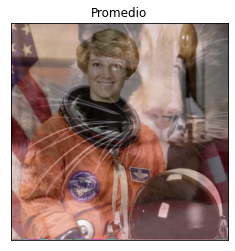

1. Suma campleada en RGB
2. Promedio
3. Interpolación
4. If-Lighter
5 Salir

Elige una opción
3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:117: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in true_divide


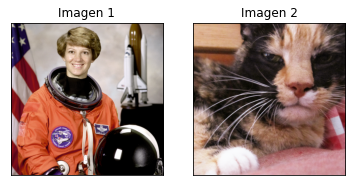

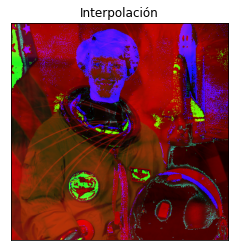

1. Suma campleada en RGB
2. Promedio
3. Interpolación
4. If-Lighter
5 Salir

Elige una opción
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


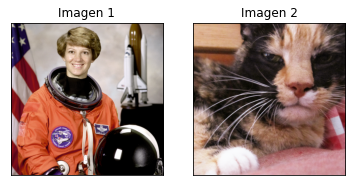

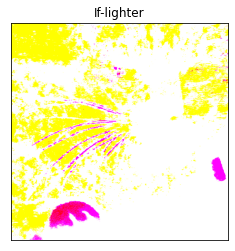

1. Suma campleada en RGB
2. Promedio
3. Interpolación
4. If-Lighter
5 Salir

Elige una opción
5


In [ ]:
#Definición de funciones 
def add_clamping(im1,im2):
  import numpy as np
  import matplotlib.pyplot as plt
  adimag=im1+im2
  #adimag=np.zeros(im1.shape)
  #*******************************
  for x in range(0, 512 - 1):              #R
    for y in range(0, 512 -1):
        a=int(im1[x,y,0])       #transformo a entero       
        b=int(im2[x,y,0])       
        c=a+b                    #para que c pueda valir >255,sino pone otro valor menor
        if c > 255:
          adimag[x,y,0]=255    
        else:
          adimag[x,y,0]=c
  #*****************************
  for x in range(0, 512 - 1):              #G
    for y in range(0, 512 -1):
        a=int(im1[x,y,1])
        b=int(im2[x,y,1])
        c=a+b
        if c > 255:
          adimag[x,y,1]=255    
        else:
          adimag[x,y,1]=c
  #*********************************
  for x in range(0, 512 - 1):              #B
    for y in range(0, 512 -1):
        a=int(im1[x,y,2])
        b=int(im2[x,y,2])
        c=a+b
        if c > 255:
          adimag[x,y,2]=255    
        else:
          adimag[x,y,2]=c
  plt.subplot(121),plt.imshow(im1,'gray'),plt.title('Imagen 1')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(im2,'gray'),plt.title('Imagen 2')
  plt.xticks([]), plt.yticks([])
  
  plt.figure(3)
  plt.imshow(adimag)
  plt.title('Campleada')
  plt.xticks([]), plt.yticks([])
  plt.show()
  
  return ()

def rest_clamping(im1,im2):
  import numpy as np
  import matplotlib.pyplot as plt
  adimag=im1+im2
  #adimag=np.zeros(im1.shape)
  #*******************************
  for x in range(0, 512 - 1):              #R
    for y in range(0, 512 -1):
        a=int(im1[x,y,0])       #transformo a entero       
        b=int(im2[x,y,0])       
        c=a-b                    #para que c pueda valir >255,sino pone otro valor menor
        if c <0:
          adimag[x,y,0]=0    
        else:
          adimag[x,y,0]=c
  #*****************************
  for x in range(0, 512 - 1):              #G
    for y in range(0, 512 -1):
        a=int(im1[x,y,1])
        b=int(im2[x,y,1])
        c=a-b
        if c < 0:
          adimag[x,y,1]=0    
        else:
          adimag[x,y,1]=c
  #*********************************
  for x in range(0, 512 - 1):              #B
    for y in range(0, 512 -1):
        a=int(im1[x,y,2])
        b=int(im2[x,y,2])
        c=a-b
        if c > 255:
          adimag[x,y,2]=0    
        else:
          adimag[x,y,2]=c

  plt.subplot(121),plt.imshow(im1,'gray'),plt.title('Imagen 1')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(im2,'gray'),plt.title('Imagen 2')
  plt.xticks([]), plt.yticks([])
  
  plt.figure(3)
  plt.imshow(adimag)
  plt.title('Resta campleada')
  plt.xticks([]), plt.yticks([])

  
  
  return ()
  
def  add_interpolacion(rgb1,rgb2):
  import numpy as np 
  import matplotlib.pyplot as plt
  yiq_add=rgb1+rgb2 
  #Imagen1 a YIQ
  yiq1=np.zeros(rgb1.shape) 
  yiq1[:,:,0]=0.229*rgb1[:,:,0]+0.587*rgb1[:,:,1]+0.114*rgb1[:,:,2]
  yiq1[:,:,1]=0.595716*rgb1[:,:,0]-0.274453*rgb1[:,:,1]-0.321263*rgb1[:,:,2]
  yiq1[:,:,2]=0.211456*rgb1[:,:,0]-0.522591*rgb1[:,:,1]+0.311135*rgb1[:,:,2]
  #Imagen2 a YIQ
  yiq2=np.zeros(rgb2.shape) 
  yiq2[:,:,0]=0.229*rgb2[:,:,0]+0.587*rgb2[:,:,1]+0.114*rgb2[:,:,2]
  yiq2[:,:,1]=0.595716*rgb2[:,:,0]-0.274453*rgb2[:,:,1]-0.321263*rgb2[:,:,2]
  yiq2[:,:,2]=0.211456*rgb2[:,:,0]-0.522591*rgb2[:,:,1]+0.311135*rgb2[:,:,2]
  #YC promediado
  yiq_add[:,:,0]=(yiq1[:,:,0]+yiq2[:,:,0])/2
  #IC 
  yiq_add[:,:,1]=((yiq1[:,:,0]*yiq1[:,:,1])+(yiq2[:,:,0]+yiq2[:,:,1]))/(yiq1[:,:,0]+yiq1[:,:,1])
  #QC 
  yiq_add[:,:,2]=((yiq1[:,:,0]*yiq1[:,:,2])+(yiq2[:,:,0]+yiq2[:,:,2]))/(yiq1[:,:,0]+yiq1[:,:,1])
  #mostrar imagen interpolada

  plt.subplot(121),plt.imshow(rgb1,'gray'),plt.title('Imagen 1')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(rgb2,'gray'),plt.title('Imagen 2')
  plt.xticks([]), plt.yticks([])
  
  plt.figure(3)
  plt.imshow(yiq_add)
  plt.title('Interpolación')
  plt.xticks([]), plt.yticks([])
  plt.show()
  

  return ()


def add_average(im1,im2):
  import numpy as np
  import matplotlib.pyplot as plt
  adimag=im1+im2
  #adimag=np.zeros(im1.shape)
  #*******************************
  for x in range(0, 512 - 1):              #R
    for y in range(0, 512 -1):
        a=int(im1[x,y,0])       #transformo a entero       
        b=int(im2[x,y,0])       
        c=(a+b)/2                    #promedio 
        adimag[x,y,0]=c    
  #*****************************
  for x in range(0, 512 - 1):              #G
    for y in range(0, 512 -1):
        a=int(im1[x,y,1])
        b=int(im2[x,y,1])
        c=(a+b)/2                    #promedio 
        adimag[x,y,1]=c    
  #*********************************
  for x in range(0, 512 - 1):              #B
    for y in range(0, 512 -1):
        a=int(im1[x,y,2])
        b=int(im2[x,y,2])
        c=(a+b)/2                    #promedio 
        adimag[x,y,2]=c    

  plt.subplot(121),plt.imshow(im1,'gray'),plt.title('Imagen 1')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(im2,'gray'),plt.title('Imagen 2')
  plt.xticks([]), plt.yticks([])
  
  plt.figure(3)
  plt.imshow(adimag)
  plt.title('Promedio')
  plt.xticks([]), plt.yticks([])
  plt.show()
  
  
  return ()


def  add_if_lighter(rgb1,rgb2):
  import numpy as np 
  import matplotlib.pyplot as plt
  rgb_add=rgb1+rgb2                 #imagenes sumadas eb RGB
  #imagen C a YIQ
  yiq_add=np.zeros(rgb_add.shape) 
  yiq_add[:,:,0]=0.229*rgb_add[:,:,0]+0.587*rgb_add[:,:,1]+0.114*rgb_add[:,:,2]
  yiq_add[:,:,1]=0.595716*rgb_add[:,:,0]-0.274453*rgb_add[:,:,1]-0.321263*rgb_add[:,:,2]
  yiq_add[:,:,2]=0.211456*rgb_add[:,:,0]-0.522591*rgb_add[:,:,1]+0.311135*rgb_add[:,:,2]
  
  #Imagen1 a YIQ
  yiq1=np.zeros(rgb1.shape) 
  yiq1[:,:,0]=0.229*rgb1[:,:,0]+0.587*rgb1[:,:,1]+0.114*rgb1[:,:,2]
  yiq1[:,:,1]=0.595716*rgb1[:,:,0]-0.274453*rgb1[:,:,1]-0.321263*rgb1[:,:,2]
  yiq1[:,:,2]=0.211456*rgb1[:,:,0]-0.522591*rgb1[:,:,1]+0.311135*rgb1[:,:,2]
  #Imagen2 a YIQ
  yiq2=np.zeros(rgb2.shape) 
  yiq2[:,:,0]=0.229*rgb2[:,:,0]+0.587*rgb2[:,:,1]+0.114*rgb2[:,:,2]
  yiq2[:,:,1]=0.595716*rgb2[:,:,0]-0.274453*rgb2[:,:,1]-0.321263*rgb2[:,:,2]
  yiq2[:,:,2]=0.211456*rgb2[:,:,0]-0.522591*rgb2[:,:,1]+0.311135*rgb2[:,:,2]
  # YA>YB
  h=yiq1[:,:,0]> yiq2[:,:,0]
  bandera=np.all(h == True)
  if bandera==True:
          #YC=YA
          yiq_add[:,:,0]= yiq1[:,:,0]
          #IC=IA
          yiq_add[:,:,1]= yiq1[:,:,1]
          #QC=QA
          yiq_add[:,:,2]= yiq1[:,:,2]

  else:
          #YC=YB
          yiq_add[:,:,0]= yiq2[:,:,0]
          #IC=IB
          yiq_add[:,:,1]= yiq2[:,:,1]
          #QC=QB
          yiq_add[:,:,2]= yiq2[:,:,2]

    
  plt.subplot(121),plt.imshow(rgb1,'gray'),plt.title('Imagen 1')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(rgb2,'gray'),plt.title('Imagen 2')
  plt.xticks([]), plt.yticks([])
  
  plt.figure(3)
  plt.imshow(yiq_add)
  plt.title('If-lighter')
  plt.xticks([]), plt.yticks([])
  plt.show()
  
 

  return ()

#*******************************************************
#******************************************************
#***********  PROGRAMA PRINCIPAL  ***********************
#
def main():
  import numpy as np 
  import matplotlib.pyplot as plt
  import imageio
  print('Las dos imagenes a hacer la operación de suma y resta son:')
  print('')
  #figura 1
  rgb1 = imageio.imread('imageio:astronaut.png')  # dimensión :(512, 512, 3)
  
  #figura 2
  rgb2 = imageio.imread('imageio:wikkie.png')
  
  #****************************
  #********  MENU  ************
  #****************************
  salir = False
  opcion = 0
  while not salir:
 
    print ("1. Suma campleada en RGB")
    print ("2. Promedio")
    print ("3. Interpolación")
    print ("4. If-Lighter")
    print ("5 Salir")

    print('') 
    print ("Elige una opción") 
    opcion = int(input())
     
    if opcion == 1:
        add_clamping(rgb1,rgb2)
    elif opcion == 2:
        add_average(rgb1,rgb2)
    elif opcion == 3:
        add_interpolacion(rgb1,rgb2)
    elif opcion == 4:
        add_if_lighter (rgb1,rgb2)
    elif opcion == 5:
        salir = True
    else:
        print ("Introduce un número entre 1 y 5")
 
    
if __name__ == '__main__':
  main()